#### Data Dictionaries

annuity_780A                : Monthly annuity amount.

cntincpaycont9m_3716944L    : Number of incoming payments in the past 9 months.

cntpmts24_3658933L          : Number of months with any incoming payment in last 24 months.

commnoinclast6m_3546845L    : Number of communications indicating low income in the last six months.

maininc_215A                : Client's primary income amount.

downpmt_116A                : Amount of downpayment.

avgdbddpdlast24m_3658932P   : Average days past or before due of payment during the last 24 months.

avgdbddpdlast3m_4187120P    : Average days past or before due of payment during the last 3 months.

In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [72]:
df = pd.read_csv('../data/processed/main_train.csv')

In [73]:
df.head(5)

,Unnamed: 0,case_id,date_decision_x,MONTH_x,WEEK_NUM_x,target_x,amtdebitincoming_4809443A,amtdebitoutgoing_4809440A,amtdepositbalance_4809441A,amtdepositincoming_4809444A,...,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,empl_employedtotal_800L,empl_industry_691L,date_decision,MONTH,WEEK_NUM,target,avgdbddpdlast3m_4187120P
0,0,0,2019-01-03,201901,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-03,201901,0,0,NaN
1,1,1,2019-01-03,201901,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-03,201901,0,0,NaN
2,2,2,2019-01-04,201901,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-04,201901,0,0,NaN
3,3,3,2019-01-03,201901,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-03,201901,0,0,NaN
4,4,4,2019-01-04,201901,0,1,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-04,201901,0,1,NaN


We want to quickly drop some duplicate columns and the unnamed column. They are not useful for further analysis.

In [74]:
df.drop(columns= ['Unnamed: 0', 'date_decision_x', 'MONTH_x', 'WEEK_NUM_x', 'target_x', 'date_decision_y', 'MONTH_y', 'WEEK_NUM_y', 'target_y'], inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 22 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   case_id                      1526659 non-null  int64  
 1   amtdebitincoming_4809443A    51109 non-null    float64
 2   amtdebitoutgoing_4809440A    51109 non-null    float64
 3   amtdepositbalance_4809441A   51109 non-null    float64
 4   amtdepositincoming_4809444A  51109 non-null    float64
 5   amtdepositoutgoing_4809442A  51109 non-null    float64
 6   annuity_780A                 1526659 non-null  float64
 7   cntincpaycont9m_3716944L     1071469 non-null  float64
 8   amount_416A                  105111 non-null   float64
 9   cntpmts24_3658933L           1065837 non-null  float64
 10  commnoinclast6m_3546845L     1183284 non-null  float64
 11  equalityempfrom_62L          37812 non-null    object 
 12  maininc_215A                 1015404 non-n

In [76]:
df.isna().sum()

case_id                              0
amtdebitincoming_4809443A      1475550
amtdebitoutgoing_4809440A      1475550
amtdepositbalance_4809441A     1475550
amtdepositincoming_4809444A    1475550
amtdepositoutgoing_4809442A    1475550
annuity_780A                         0
cntincpaycont9m_3716944L        455190
amount_416A                    1421548
cntpmts24_3658933L              460822
commnoinclast6m_3546845L        343375
equalityempfrom_62L            1488847
maininc_215A                    511255
downpmt_116A                         0
avgdbddpdlast24m_3658932P       613202
empl_employedtotal_800L        1004548
empl_industry_691L             1004548
date_decision                        0
MONTH                                0
WEEK_NUM                             0
target                               0
avgdbddpdlast3m_4187120P        948244
dtype: int64

In [77]:
df.shape

(1526659, 22)

Based on the info we have on our dataset currently. We decided that some of the columns have way too much null values. We did some quick calculations below to determine exactly how much null values are present in the full dataset and from there made an executive decision to drop them because we think they would not provide us with any meaningful information. 

Here are the columns we will be dropping below as well as its calculations.

"amtdebitincoming_4809443A    51109  / 1526659 = 3.3% non null value out of the whole column (Not sufficient for analysis)

amtdebitoutgoing_4809440A    51109  / 1526659 = 3.3% non null value out of the whole column (Not sufficient for analysis)

amtdepositbalance_4809441A   51109  / 1526659 = 3.3% non null value out of the whole column (Not sufficient for analysis)

amtdepositincoming_4809444A  51109  / 1526659 = 3.3% non null value out of the whole column (Not sufficient for analysis)

amtdepositoutgoing_4809442A  51109  / 1526659 = 3.3% non null value out of the whole column (Not sufficient for analysis)

amount_416A                  105111 / 1526659 = 6.9% non null value out of the whole column (Not sufficient for analysis)

equalityempfrom_62L          37812  / 1526659 = 2.5% non null value out of the whole column (Not sufficient for analysis)"



In [78]:
new_df = df.drop(columns= ['amtdebitincoming_4809443A','amtdebitoutgoing_4809440A', 'amtdepositbalance_4809441A', 'amtdepositincoming_4809444A', 'amtdepositoutgoing_4809442A', 'amount_416A', 'equalityempfrom_62L'], axis = 1)

new_df.head(5)

,case_id,annuity_780A,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,empl_employedtotal_800L,empl_industry_691L,date_decision,MONTH,WEEK_NUM,target,avgdbddpdlast3m_4187120P
0,0,1917.6,NaN,NaN,0.0,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-03,201901,0,0,NaN
1,1,3134.0,NaN,NaN,0.0,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-03,201901,0,0,NaN
2,2,4937.0,NaN,NaN,NaN,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-04,201901,0,0,NaN
3,3,4643.6,NaN,NaN,0.0,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-03,201901,0,0,NaN
4,4,3390.2,NaN,NaN,0.0,NaN,0.0,NaN,MORE_FIVE,OTHER,2019-01-04,201901,0,1,NaN


We decided that we would convert this categorical column into binary true or false on whether or not someone has reported their employment history. This is because we determined that this column would be important in our analysis, but we have way too much null values in our columns. We didn't want to introduce bias by adding in new data, or oversampling the data and introduction incorrect correlation between variables. That is why we decided to look at this data from a high level view and convert the data into binary values.

"empl_employedtotal_800L"


In [79]:
new_df['empl_employedtotal_800L'].fillna(value = 'Missing', inplace = True)
new_df['empl_employedtotal_800L'].replace(to_replace = ['MORE_FIVE','MORE_ONE','LESS_ONE'] , value = "Present", inplace = True)

new_df["empl_employedtotal_800L"].value_counts()

empl_employedtotal_800L
Missing    1004548
Present     522111
Name: count, dtype: int64

** NOTE TO SELF ** 

"empl_industry_691L" - We will conduct some EDA on this column and later deciding what we should do with it since it contains so much null values but still important data.

"empl_employedtotal_800L" and "691L" could they both share the same missing value in terms of the rows? Might be interesting to look at when considering machine learning model and whether we should drop one column.

We decided after doing some statistical exploration on the column "avgdbddpdlast24m_3658932P" that we would fill in the rest of the missing value with median. Since the median best captures the overall data without introducing much bias and influence on the overall column. It seems like the best solution towards tackling the missing values.

In [80]:
compute_median = new_df['avgdbddpdlast24m_3658932P'].median()
new_df['avgdbddpdlast24m_3658932P'].fillna(compute_median, inplace = True)
new_df['avgdbddpdlast24m_3658932P'].isna().sum()

0

In [81]:
new_df.head(5)

,case_id,annuity_780A,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,empl_employedtotal_800L,empl_industry_691L,date_decision,MONTH,WEEK_NUM,target,avgdbddpdlast3m_4187120P
0,0,1917.6,NaN,NaN,0.0,NaN,0.0,-5.0,Present,OTHER,2019-01-03,201901,0,0,NaN
1,1,3134.0,NaN,NaN,0.0,NaN,0.0,-5.0,Present,OTHER,2019-01-03,201901,0,0,NaN
2,2,4937.0,NaN,NaN,NaN,NaN,0.0,-5.0,Present,OTHER,2019-01-04,201901,0,0,NaN
3,3,4643.6,NaN,NaN,0.0,NaN,0.0,-5.0,Present,OTHER,2019-01-03,201901,0,0,NaN
4,4,3390.2,NaN,NaN,0.0,NaN,0.0,-5.0,Present,OTHER,2019-01-04,201901,0,1,NaN


In [82]:
new_df.shape

(1526659, 15)

Our data is way too large and computationally heavy to conduct EDA. To speed up the process I decided to use random sampling on my data.
Since our goal is to initially explore data in order to identify trends and patterns a smaller sample size could work. 
We decided to take 50,000 samples from our original data to complete this analysis.

In [83]:
sampled_df = new_df.sample(n=50000, random_state=42)

In [84]:
sampled_df

,case_id,annuity_780A,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,empl_employedtotal_800L,empl_industry_691L,date_decision,MONTH,WEEK_NUM,target,avgdbddpdlast3m_4187120P
1322328,1916357,6747.2000,0.0,0.0,0.0,28000.0,0.0,-5.0,Missing,NaN,2020-09-03,202009,87,0,NaN
597755,982288,2206.6000,NaN,NaN,0.0,NaN,3000.0,-5.0,Missing,NaN,2020-05-13,202005,71,0,NaN
1325416,1919445,3342.4001,3.0,15.0,0.0,56000.0,0.0,-5.0,Missing,NaN,2020-09-05,202009,87,0,NaN
877847,1471876,3141.4001,9.0,12.0,0.0,20000.0,0.0,-6.0,Missing,NaN,2019-08-02,201908,30,0,-3.0
210557,255991,6327.6000,16.0,14.0,0.0,NaN,0.0,-8.0,Missing,NaN,2020-09-22,202009,90,0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423403,2600158,8596.4000,5.0,12.0,0.0,174000.0,0.0,0.0,Missing,NaN,2019-07-23,201907,29,0,NaN
1328648,1922677,1998.6000,0.0,11.0,0.0,6000.0,0.0,1819.0,Missing,NaN,2020-09-08,202009,88,1,NaN
1040747,1634776,1485.2001,0.0,7.0,0.0,31200.0,0.0,-6.0,Present,GOVERNMENT,2019-11-17,201911,45,0,NaN
648555,1242584,1980.4000,0.0,NaN,0.0,6000.0,0.0,-5.0,Missing,NaN,2019-01-06,201901,0,0,NaN


In [85]:
sampled_df.shape

(50000, 15)

In [87]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1322328 to 1188543
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   case_id                    50000 non-null  int64  
 1   annuity_780A               50000 non-null  float64
 2   cntincpaycont9m_3716944L   35082 non-null  float64
 3   cntpmts24_3658933L         34872 non-null  float64
 4   commnoinclast6m_3546845L   38770 non-null  float64
 5   maininc_215A               33287 non-null  float64
 6   downpmt_116A               50000 non-null  float64
 7   avgdbddpdlast24m_3658932P  50000 non-null  float64
 8   empl_employedtotal_800L    50000 non-null  object 
 9   empl_industry_691L         17054 non-null  object 
 10  date_decision              50000 non-null  object 
 11  MONTH                      50000 non-null  int64  
 12  WEEK_NUM                   50000 non-null  int64  
 13  target                     50000 non-null  

## Univariate Analysis

Let's start with a simple univariate analysis to identify outliers and distribution that is present in our dataset.

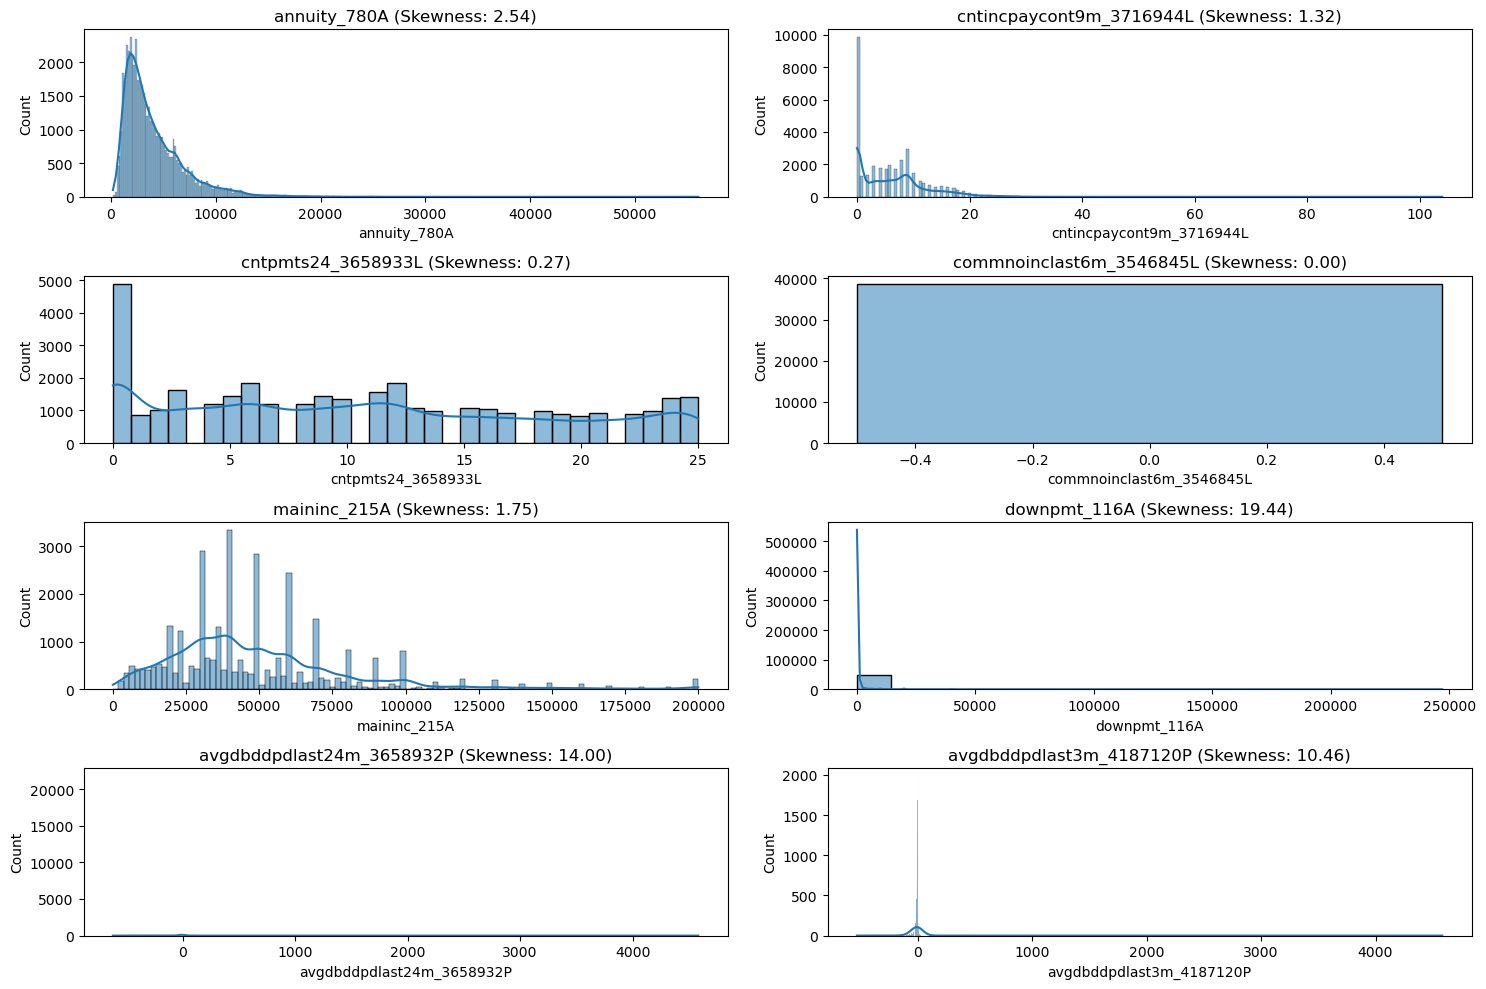

annuity_780A                  2.544277
cntincpaycont9m_3716944L      1.321153
cntpmts24_3658933L            0.271220
commnoinclast6m_3546845L      0.000000
maininc_215A                  1.752922
downpmt_116A                 19.441228
avgdbddpdlast24m_3658932P    13.996934
avgdbddpdlast3m_4187120P     10.463263
dtype: float64

In [88]:
# Calculating the skewness of each feature
to_drop = ['case_id', 'empl_employedtotal_800L', 'empl_industry_691L', 'date_decision', 'MONTH', 'WEEK_NUM', 'target']
other_columns = sampled_df.drop(to_drop, axis=1).columns
feature_skewness = sampled_df[other_columns].skew()

# Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(other_columns, 1):  # Excluding the target variable
    plt.subplot(4, 2, i)
    sns.histplot(sampled_df[column], kde=True)
    plt.title(f'{column} (Skewness: {feature_skewness[column]:.2f})')

plt.tight_layout()
plt.show()

feature_skewness

Let's bring back the data dictionaries to see what these columns are supposed to represent.

annuity_780A                : Monthly annuity amount. (A fixed sum of money paid to someone each month, typically for the rest of their life.)

cntincpaycont9m_3716944L    : Number of incoming payments in the past 9 months.

cntpmts24_3658933L          : Number of months with any incoming payment in last 24 months.

commnoinclast6m_3546845L    : Number of communications indicating low income in the last six months.

maininc_215A                : Client's primary income amount.

downpmt_116A                : Amount of downpayment.

avgdbddpdlast24m_3658932P   : Average days past or before due of payment during the last 24 months.

avgdbddpdlast3m_4187120P    : Average days past or before due of payment during the last 3 months.

In [93]:
sampled_df['commnoinclast6m_3546845L'].value_counts()

commnoinclast6m_3546845L
0.0    38770
Name: count, dtype: int64

From our visualizations above and also by looking at the value counts of the column 'commnoinclast6m_3546845L' we notice that there isn't any data that would be relevant to our analysis. So we decide that we would drop this column.

What the data in that column is basically representing is that there is 0 communication indicating low income in the last six months.

In [94]:
sampled_df.drop(axis = 1, columns = ['commnoinclast6m_3546845L'], inplace= True)

In [96]:
sampled_df.shape

(50000, 14)

## Bivariate Analysis

Next lets move onto Bivariate analysis to see if there are any correlations between columns.

Clients primary income and X

Is there also a correlation between downpayments?

<Axes: >

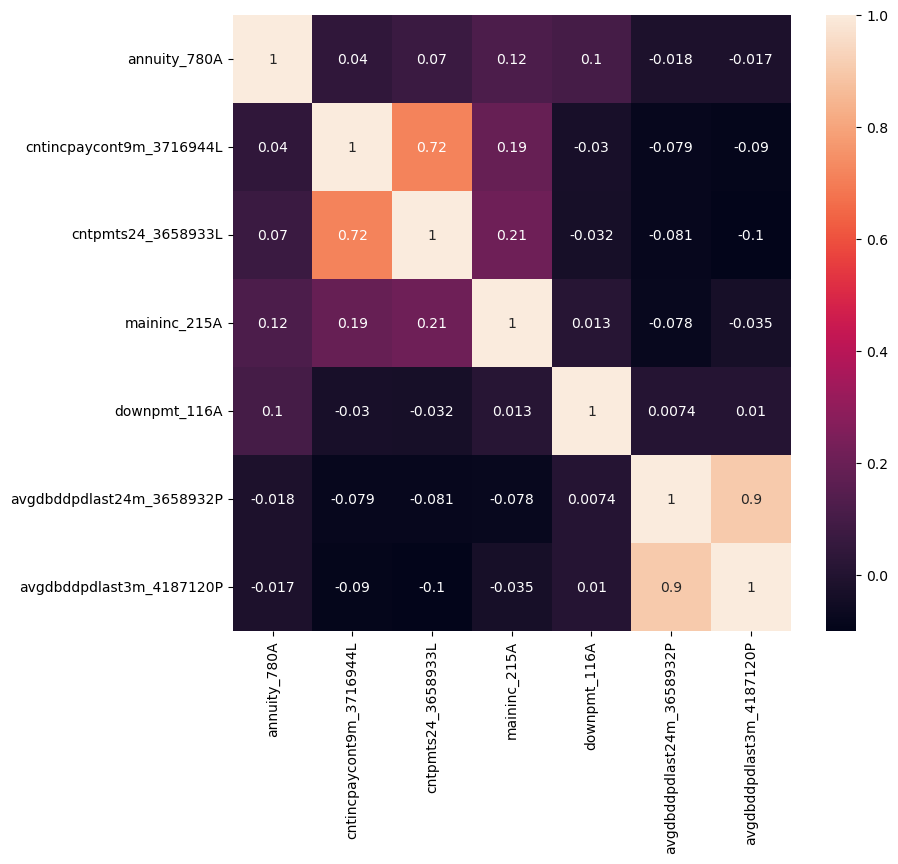

In [98]:
#heatmap for feature correlation evaluation 

selected_col = ['annuity_780A', 'cntincpaycont9m_3716944L', 'cntpmts24_3658933L', 'maininc_215A', 'downpmt_116A', 'avgdbddpdlast24m_3658932P', 'avgdbddpdlast3m_4187120P']

plt.figure(figsize=(9,8))

sns.heatmap(sampled_df[selected_col].corr(), annot=True)